In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [96]:
# 0 = suspicious            1 = legitimate

file1_path = "Phishing_Legitimate_full.csv"
df1 = pd.read_csv(file1_path)

class_counts = df1['CLASS_LABEL'].value_counts()
# print(df1.shape)
print(class_counts)
# df1

CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64


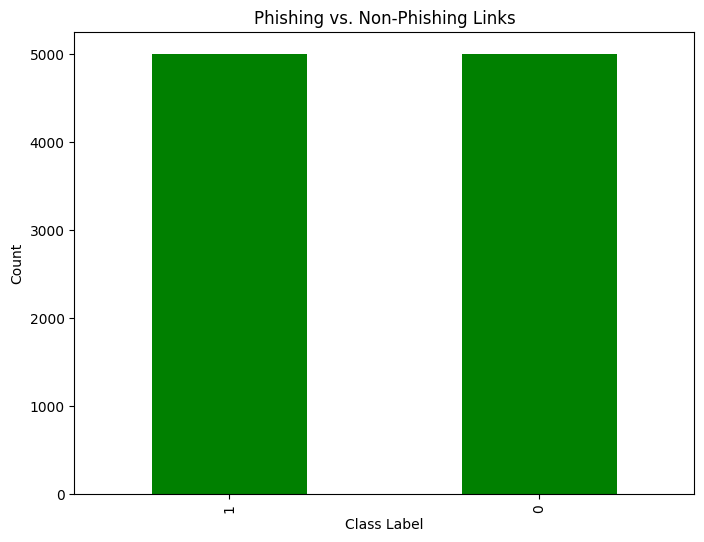

In [97]:
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='green')
plt.title('Phishing vs. Non-Phishing Links')
plt.xlabel('Class Label')
plt.ylabel('Count')

plt.show()

In [98]:
x1 = df1.drop(columns=['CLASS_LABEL', 'id']) # Include all columns except CLASS_LABEL and id
y1 = df1['CLASS_LABEL']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [99]:
rf_model1 = RandomForestClassifier()
rf_model1.fit(x1_train, y1_train)

RandomForestClassifier()

In [100]:
xgb_model1 = xgb.XGBClassifier()
xgb_model1.fit(x1_train, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [101]:
lgb_model1 = lgb.LGBMClassifier()
lgb_model1.fit(x1_train, y1_train)

[LightGBM] [Info] Number of positive: 3988, number of negative: 4012
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1512
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498500 -> initscore=-0.006000
[LightGBM] [Info] Start training from score -0.006000


LGBMClassifier()

In [102]:
rf_predictions_phishing = rf_model1.predict(x1_test)
xgb_predictions_phishing = xgb_model1.predict(x1_test)
lgb_predictions_phishing = lgb_model1.predict(x1_test)

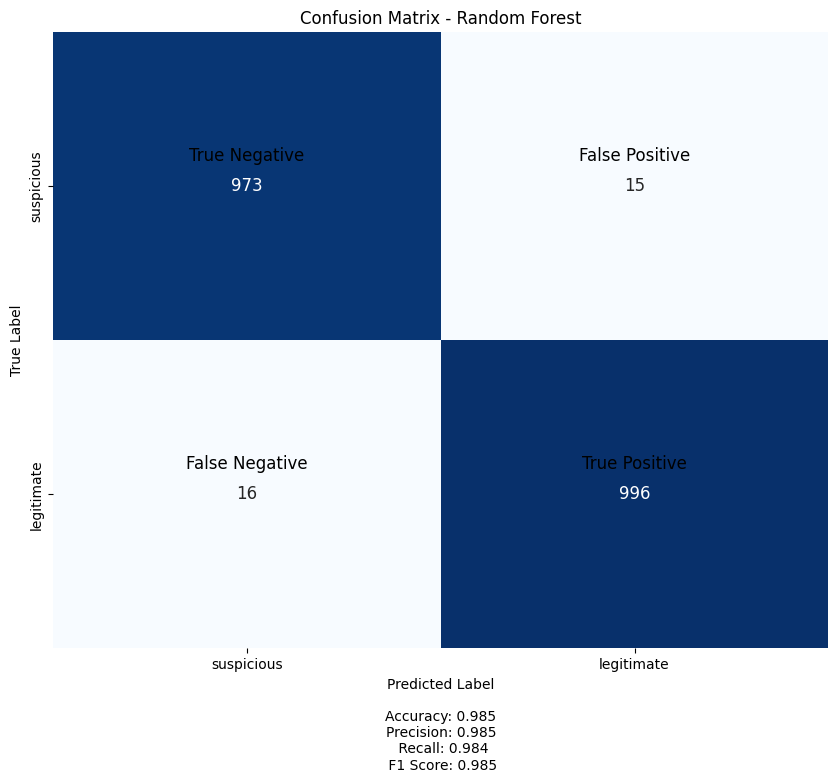

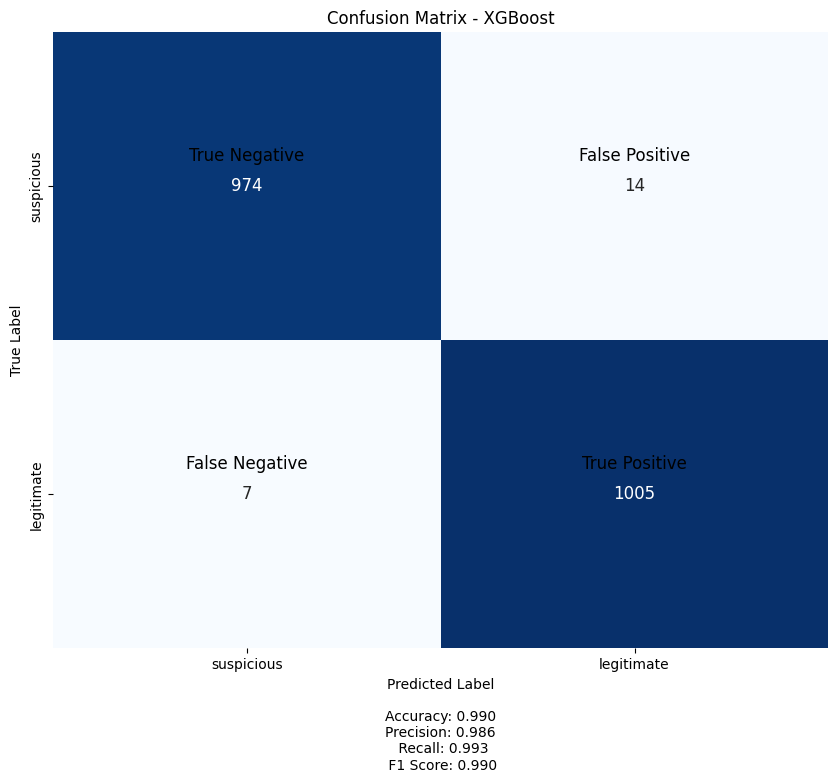

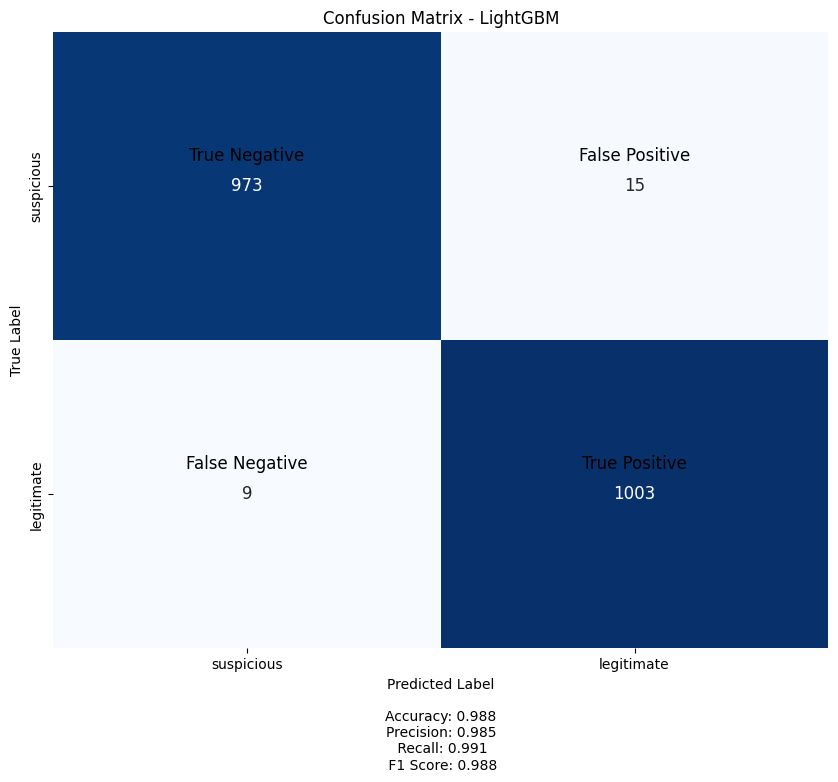

In [103]:
labels = ["suspicious", "legitimate"]

# Confusion Matrix for Random Forest
rf_conf_matrix_phishing = confusion_matrix(y1_test, rf_predictions_phishing)

# Confusion Matrix for XGBoost
xgb_conf_matrix_phishing = confusion_matrix(y1_test, xgb_predictions_phishing)

# Confusion Matrix for LightGBM
lgb_conf_matrix_phishing = confusion_matrix(y1_test, lgb_predictions_phishing)

# Calculate accuracy for Random Forest
rf_accuracy_phishing = accuracy_score(y1_test, rf_predictions_phishing)
rf_precision_phishing= precision_score(y1_test, rf_predictions_phishing)
rf_recall_phishing = recall_score(y1_test, rf_predictions_phishing)
rf_f1_score_phishing = f1_score(y1_test, rf_predictions_phishing)

# Calculate accuracy for XGBoost
xgb_accuracy_phishing = accuracy_score(y1_test, xgb_predictions_phishing)
xgb_precision_phishing = precision_score(y1_test, xgb_predictions_phishing)
xgb_recall_phishing = recall_score(y1_test, xgb_predictions_phishing)
xgb_f1_score_phishing = f1_score(y1_test, xgb_predictions_phishing)

# Calculate accuracy for LightGBM
lgb_accuracy_phishing = accuracy_score(y1_test, lgb_predictions_phishing)
lgb_precision_phishing = precision_score(y1_test, lgb_predictions_phishing)
lgb_recall_phishing = recall_score(y1_test, lgb_predictions_phishing)
lgb_f1_score_phishing = f1_score(y1_test, lgb_predictions_phishing)

# Plotting Confusion Matrix for Random Forest
plt.figure(figsize=(10, 8))
sns.heatmap(rf_conf_matrix_phishing, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"fontsize": 12})
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label\n\nAccuracy: {:.3f}\nPrecision: {:.3f}\n Recall: {:.3f}\n F1 Score: {:.3f}".format(rf_accuracy_phishing, rf_precision_phishing, rf_recall_phishing, rf_f1_score_phishing))
plt.ylabel("True Label")
plt.text(0.5, 0.4, "True Negative", ha='center', va='center', fontsize=12)
plt.text(1.5, 0.4, "False Positive", ha='center', va='center', fontsize=12)
plt.text(0.5, 1.4, "False Negative", ha='center', va='center', fontsize=12)
plt.text(1.5, 1.4, "True Positive", ha='center', va='center', fontsize=12)
plt.xticks(ticks=[0.5, 1.5], labels=labels)
plt.yticks(ticks=[0.5, 1.5], labels=labels)
plt.show()

# Plotting Confusion Matrix for XGBoost
plt.figure(figsize=(10, 8))
sns.heatmap(xgb_conf_matrix_phishing, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"fontsize": 12})
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label\n\nAccuracy: {:.3f}\nPrecision: {:.3f}\n Recall: {:.3f}\n F1 Score: {:.3f}".format(xgb_accuracy_phishing, xgb_precision_phishing, xgb_recall_phishing, xgb_f1_score_phishing))
plt.ylabel("True Label")
plt.text(0.5, 0.4, "True Negative", ha='center', va='center', fontsize=12)
plt.text(1.5, 0.4, "False Positive", ha='center', va='center', fontsize=12)
plt.text(0.5, 1.4, "False Negative", ha='center', va='center', fontsize=12)
plt.text(1.5, 1.4, "True Positive", ha='center', va='center', fontsize=12)
plt.xticks(ticks=[0.5, 1.5], labels=labels)
plt.yticks(ticks=[0.5, 1.5], labels=labels)
plt.show()

# Plotting Confusion Matrix for LightGBM
plt.figure(figsize=(10, 8))
sns.heatmap(lgb_conf_matrix_phishing, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"fontsize": 12})
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted Label\n\nAccuracy: {:.3f}\nPrecision: {:.3f}\n Recall: {:.3f}\n F1 Score: {:.3f}".format(lgb_accuracy_phishing, lgb_precision_phishing, lgb_recall_phishing, lgb_f1_score_phishing))
plt.ylabel("True Label")
plt.text(0.5, 0.4, "True Negative", ha='center', va='center', fontsize=12)
plt.text(1.5, 0.4, "False Positive", ha='center', va='center', fontsize=12)
plt.text(0.5, 1.4, "False Negative", ha='center', va='center', fontsize=12)
plt.text(1.5, 1.4, "True Positive", ha='center', va='center', fontsize=12)
plt.xticks(ticks=[0.5, 1.5], labels=labels)
plt.yticks(ticks=[0.5, 1.5], labels=labels)
plt.show()

In [105]:
combined_predictions_phishing = (rf_predictions_phishing + xgb_predictions_phishing + lgb_predictions_phishing) / 3

# Convert combined predictions to binary (0 or 1)
combined_predictions_binary = np.round(combined_predictions_phishing)

# Calculate accuracy for combined predictions
phishing_accuracy = (combined_predictions_binary == y1_test).mean()

# Calculate precision for combined predictions
phishing_precision = precision_score(y1_test, combined_predictions_binary)

# Calculate recall for combined predictions
phishing_recall = recall_score(y1_test, combined_predictions_binary)

# Calculate F1 score for combined predictions
phishing_f1_score = f1_score(y1_test, combined_predictions_binary)

# Print the metrics
print(f"Combined Accuracy for Phishing Dataset: {phishing_accuracy * 100:.2f}%")
print(f"Combined Precision for Phishing Dataset: {phishing_precision * 100:.2f}%")
print(f"Combined Recall for Phishing Dataset: {phishing_recall * 100:.2f}%")
print(f"Combined F1 Score for Phishing Dataset: {phishing_f1_score * 100:.2f}%")

Combined Accuracy for Phishing Dataset: 98.90%
Combined Precision for Phishing Dataset: 98.62%
Combined Recall for Phishing Dataset: 99.21%
Combined F1 Score for Phishing Dataset: 98.92%


In [106]:
file2_path = "Malware dataset.csv"
df2 = pd.read_csv(file2_path)

classification = df2['classification'].value_counts()

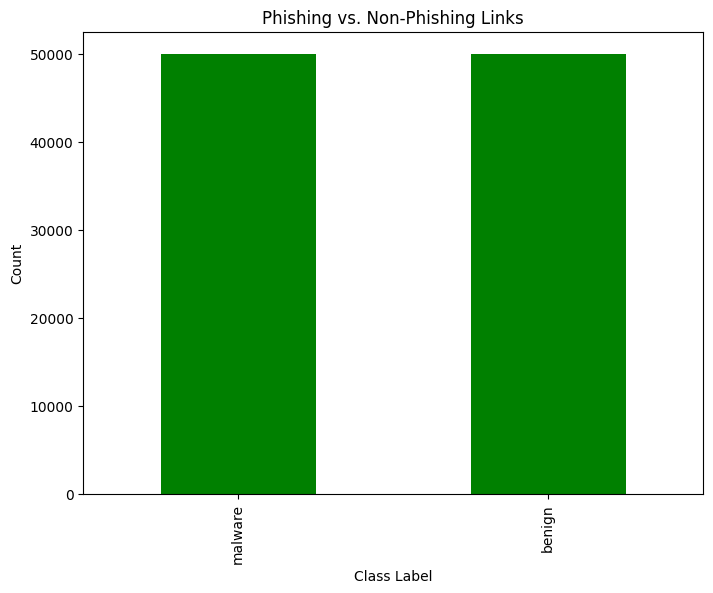

In [107]:
plt.figure(figsize=(8, 6))
classification.plot(kind='bar', color='green')
plt.title('Phishing vs. Non-Phishing Links')
plt.xlabel('Class Label')
plt.ylabel('Count')

plt.show()

In [108]:
x2 = df2.drop(columns=['hash', 'classification']) # Include all columns except hash and classification
y2 = df2['classification']

label_encoder = LabelEncoder()
y2_encoded = label_encoder.fit_transform(y2)

print("Encoded Classes:", label_encoder.classes_)

mapping = {label: encoded for label, encoded in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}
print("Mapping:", mapping)

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2_encoded, test_size=0.2, random_state=42)

Encoded Classes: ['benign' 'malware']
Mapping: {'benign': 0, 'malware': 1}


In [109]:
rf_model2 = RandomForestClassifier()
rf_model2.fit(x2_train, y2_train)

df2['classification'].value_counts()

classification
malware    50000
benign     50000
Name: count, dtype: int64

In [110]:
# Define the classifier
rf_classifier = RandomForestClassifier()

# Define the number of folds for cross-validation
num_folds = 5

# Define the cross-validation strategy (e.g., KFold)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, x2_train, y2_train, cv=kfold, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)
print("Standard Deviation of CV Scores:", std_cv_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0
Standard Deviation of CV Scores: 0.0


In [81]:
xgb_model2 = xgb.XGBClassifier()
xgb_model2.fit(x2_train, y2_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [82]:
lgb_model2 = lgb.LGBMClassifier()
lgb_model2.fit(x2_train, y2_train)

[LightGBM] [Info] Number of positive: 40030, number of negative: 39970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3080
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500375 -> initscore=0.001500
[LightGBM] [Info] Start training from score 0.001500


LGBMClassifier()

In [83]:
rf_predictions_malware = rf_model2.predict(x2_test)
xgb_predictions_malware = xgb_model2.predict(x2_test)
lgb_predictions_malware = lgb_model2.predict(x2_test)

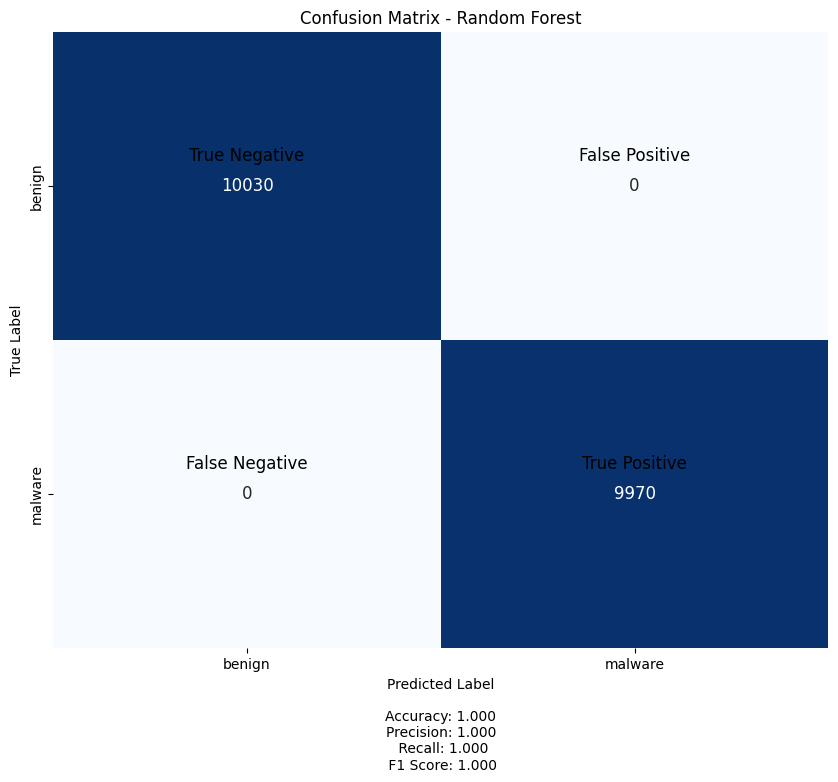

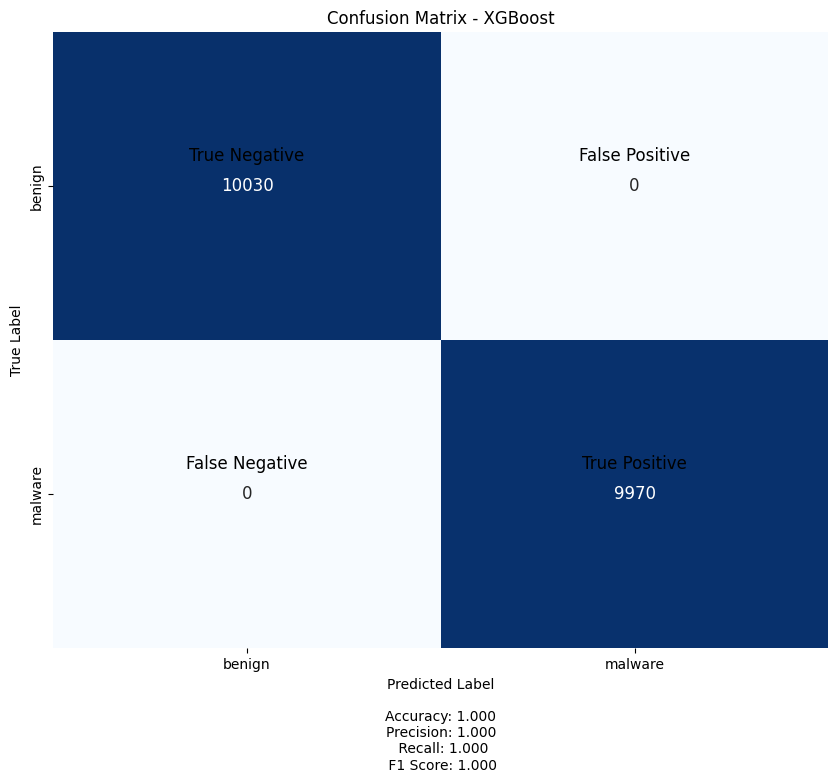

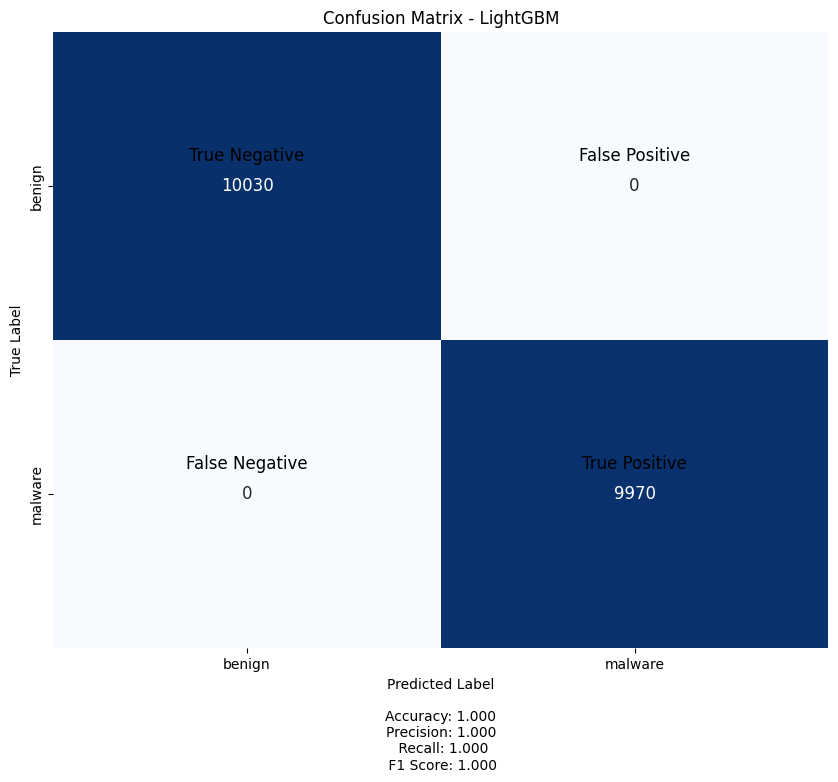

In [86]:
labels = ["benign", "malware"]

# Confusion Matrix for Random Forest
rf_conf_matrix_malware = confusion_matrix(y2_test, rf_predictions_malware)

# Confusion Matrix for XGBoost
xgb_conf_matrix_malware = confusion_matrix(y2_test, xgb_predictions_malware)

# Confusion Matrix for LightGBM
lgb_conf_matrix_malware = confusion_matrix(y2_test, lgb_predictions_malware)

# Calculate accuracy for Random Forest
rf_accuracy_malware = accuracy_score(y2_test, rf_predictions_malware)
rf_precision_malware = precision_score(y2_test, rf_predictions_malware)
rf_recall_malware = recall_score(y2_test, rf_predictions_malware)
rf_f1_score_malware = f1_score(y2_test, rf_predictions_malware)

# Calculate accuracy for XGBoost
xgb_accuracy_malware = accuracy_score(y2_test, xgb_predictions_malware)
xgb_precision_malware = precision_score(y2_test, xgb_predictions_malware)
xgb_recall_malware = recall_score(y2_test, xgb_predictions_malware)
xgb_f1_score_malware = f1_score(y2_test, xgb_predictions_malware)

# Calculate accuracy for LightGBM
lgb_accuracy_malware = accuracy_score(y2_test, lgb_predictions_malware)
lgb_precision_malware = precision_score(y2_test, lgb_predictions_malware)
lgb_recall_malware = recall_score(y2_test, lgb_predictions_malware)
lgb_f1_score_malware = f1_score(y2_test, lgb_predictions_malware)

# Plotting Confusion Matrix for Random Forest
plt.figure(figsize=(10, 8))
sns.heatmap(rf_conf_matrix_malware, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"fontsize": 12})
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label\n\nAccuracy: {:.3f}\nPrecision: {:.3f}\n Recall: {:.3f}\n F1 Score: {:.3f}".format(rf_accuracy_malware, rf_precision_malware, rf_recall_malware, rf_f1_score_malware))
plt.ylabel("True Label")
plt.text(0.5, 0.4, "True Negative", ha='center', va='center', fontsize=12)
plt.text(1.5, 0.4, "False Positive", ha='center', va='center', fontsize=12)
plt.text(0.5, 1.4, "False Negative", ha='center', va='center', fontsize=12)
plt.text(1.5, 1.4, "True Positive", ha='center', va='center', fontsize=12)
plt.xticks(ticks=[0.5, 1.5], labels=labels)
plt.yticks(ticks=[0.5, 1.5], labels=labels)
plt.show()

# Plotting Confusion Matrix for XGBoost
plt.figure(figsize=(10, 8))
sns.heatmap(xgb_conf_matrix_malware, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"fontsize": 12})
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label\n\nAccuracy: {:.3f}\nPrecision: {:.3f}\n Recall: {:.3f}\n F1 Score: {:.3f}".format(xgb_accuracy_malware, xgb_precision_malware, xgb_recall_malware, xgb_f1_score_malware))
plt.ylabel("True Label")
plt.text(0.5, 0.4, "True Negative", ha='center', va='center', fontsize=12)
plt.text(1.5, 0.4, "False Positive", ha='center', va='center', fontsize=12)
plt.text(0.5, 1.4, "False Negative", ha='center', va='center', fontsize=12)
plt.text(1.5, 1.4, "True Positive", ha='center', va='center', fontsize=12)
plt.xticks(ticks=[0.5, 1.5], labels=labels)
plt.yticks(ticks=[0.5, 1.5], labels=labels)
plt.show()

# Plotting Confusion Matrix for LightGBM
plt.figure(figsize=(10, 8))
sns.heatmap(lgb_conf_matrix_malware, annot=True, fmt="d", cmap="Blues", cbar=False,
            annot_kws={"fontsize": 12})
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted Label\n\nAccuracy: {:.3f}\nPrecision: {:.3f}\n Recall: {:.3f}\n F1 Score: {:.3f}".format(lgb_accuracy_malware, lgb_precision_malware, lgb_recall_malware, lgb_f1_score_malware))
plt.ylabel("True Label")
plt.text(0.5, 0.4, "True Negative", ha='center', va='center', fontsize=12)
plt.text(1.5, 0.4, "False Positive", ha='center', va='center', fontsize=12)
plt.text(0.5, 1.4, "False Negative", ha='center', va='center', fontsize=12)
plt.text(1.5, 1.4, "True Positive", ha='center', va='center', fontsize=12)
plt.xticks(ticks=[0.5, 1.5], labels=labels)
plt.yticks(ticks=[0.5, 1.5], labels=labels)
plt.show()


In [74]:
combined_predictions_malware = (rf_predictions_malware + xgb_predictions_malware + lgb_predictions_malware) / 3
combined_accuracy_malware = (combined_predictions_malware == y2_test).mean()
print(f"Combined Accuracy for Malware Dataset: {combined_accuracy_malware * 100:.2f}%")

Combined Accuracy for Malware Dataset: 100.00%
